# Image Classification - Handwritten Digits
--------------------------
In this project we will use Deep Neural Networks for image classification. We shall use [handwritten digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI which is available on sklearn.

In [48]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Settings
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

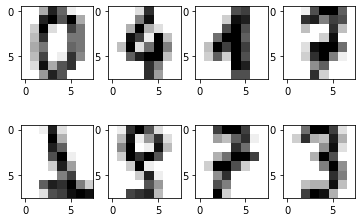

In [45]:
#load data
digits_data = load_digits()

#visualize few random images
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(digits_data['data'][0].reshape(8,8), cmap='gray_r')
ax[0,1].imshow(digits_data['data'][100].reshape(8,8), cmap='gray_r')
ax[0,2].imshow(digits_data['data'][200].reshape(8,8), cmap='gray_r')
ax[0,3].imshow(digits_data['data'][300].reshape(8,8), cmap='gray_r')
ax[1,0].imshow(digits_data['data'][1000].reshape(8,8), cmap='gray_r')
ax[1,1].imshow(digits_data['data'][1100].reshape(8,8), cmap='gray_r')
ax[1,2].imshow(digits_data['data'][1200].reshape(8,8), cmap='gray_r')
ax[1,3].imshow(digits_data['data'][1300].reshape(8,8), cmap='gray_r');

Our input data looks good. We could visualize the data images. Let's split the data into train and test and build different models.

In [47]:
#split data
x_train, x_test, y_train, y_test = train_test_split(digits_data['data'], digits_data['target'],
                                                   random_state=0)

x_train.shape, y_train.shape
x_test.shape, y_test.shape

((1347, 64), (1347,))

((450, 64), (450,))

-----------------------
### k-NN

- use different cv to find best performing model
- use "Accuracy" to validate model to find best cv.
- use it to make predictions on test set.

In [102]:
#function to train k-NN model

def knn_train(xtrain, ytrain):
    knn = KNeighborsClassifier()
    
    cv_scores = {}
    for cross_val in np.arange(2,21):
        scores = cross_val_score(knn, xtrain, ytrain, cv=cross_val, scoring="accuracy")
        avg_score = np.mean(scores)
        cv_scores[cross_val] = avg_score
    
    best_cv = max(cv_scores, key=cv_scores.get)
    return best_cv, cv_scores[best_cv], cv_scores

    
#apply above function to find best cross validation and accuracy score on train set
cv, acc_score, all_scores = knn_train(x_train, y_train)

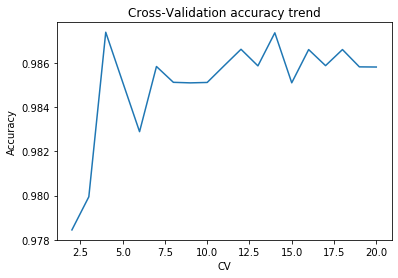

In [104]:
#visualize accuracy scores
plt.plot(list(all_scores.keys()), list(all_scores.values()))
plt.title("Cross-Validation accuracy trend")
plt.xlabel("CV")
plt.ylabel("Accuracy")
plt.show();

In [105]:
#print best model with accuracy score
print("Best accuracy socre of {0:.3f} is achieved at {1} cross validations on training set".format(acc_score,cv))

Best accuracy socre of 0.987 is achieved at 4 cross validations on training set
